# Исследование продаж игр

## Оглавление

[Шаг 1. Откройте файл с данными и изучите общую информацию](#read_data)  

[Шаг 2. Подготовьте данные](#preparing_data)  

[Преобразование данных в нужные типы](#1)  
[Пропуски и дубликаты](#2)

[Шаг 3. Проведите исследовательский анализ данных](#analyze_data)  

[Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?](#3)  
[Посмотрите, как менялись продажи по платформам.](#4)  
[Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.](#5)  
[За какой характерный срок появляются новые и исчезают старые платформы?](#6)  
[Возьмите данные за соответствующий актуальный период.](#7)  
[Какие платформы лидируют по продажам, растут или падают?](#8)  
[Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.](#9)  
[Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков](#10)  
[Посмотрите на общее распределение игр по жанрам.](#11)  

[Шаг 4. Составьте портрет пользователя каждого региона](#client_portrait)  

[Самые популярные платформы (топ-5). Опишите различия в долях продаж.](#12)  
[Самые популярные жанры (топ-5). Поясните разницу.](#13)  
[Влияет ли рейтинг ESRB на продажи в отдельном регионе?](#14)  

[Шаг 5. Проверьте гипотезы](#hypothesis)  

[Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.](#15)  
[Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.](#16)  

[Шаг 6. Напишите общий вывод](#conclusion)

Базовые вопросы обозначены 📌   

### Шаг 1. Откройте файл с данными и изучите общую информацию<a name="read_data"></a>

Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

Чтение данных

In [2]:
try:
    df_games = pd.read_csv('/datasets/games.csv')
except:
    df_games = pd.read_csv('C:/Users/maxbe/Desktop/Яндекс.Практикум/python проекты/py/project5/games.csv')

Копия данных для возможных сверок

In [3]:
data_games = df_games.copy()

Информация о данных в таблице

In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Униклаьные годы выпуска игры.

In [5]:
df_games['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Визуальное представление данных

In [6]:
df_games.head(1)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


**Выводы по информации в info()**  

**Изменение типов данных**  

1. Year_of_Release поменяем с float на int  
2. User_Score поменяем с float на int  

**Пропуски**  

Критичное количество пропусков в полях: Critic_Score, User_Score, Rating  
Некритичное количество пропусков: Year_of_Release, Name, Genre  

Пропуски рейтинга и оценок в столбцах лучше не менять. Скорее всего это значит, что игру не оценивали. Если заполним эти пропуски средним или медианой скорее всего создадим перекос данных в сторону среднего/медианы. То есть превалирующим значением в этом случае станет средняя или медиана.  

Пропуски Year_of_Release, Name, Genre можно изучить подробнее и по итогу, заменить или удалить.

Перед изменением типов данных построим таблицу min, max, чтобы понять какой оптимальный тип данных подобрать исходя из мин.макс значений.

In [7]:
df_games[['Critic_Score', 'Year_of_Release', 'NA_sales', 'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score']].describe(
    ).loc[['min', 'max']].T

,min,max
Critic_Score,13.0,98.00
Year_of_Release,1980.0,2016.00
NA_sales,0.0,41.36
JP_sales,0.0,10.22
Other_sales,0.0,10.57
Critic_Score,13.0,98.00


Числа в столбцах небольшие, можем заменить на типы данных float16 и uint16 для экономии памяти.

## Шаг 2. Подготовьте данные<a name="preparing_data"></a>

#### Заменить названия столбцов (приведите к нижнему регистру)

In [8]:
#df_games.columns = map(str.lower, df_games.columns)
df_games.columns = df_games.columns.str.lower()
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

📌  
#### Преобразование данных в нужные типы<a name="1"></a>

При попытке конвертации user_score в тип данных float выскакивает ошибка, что нельзя конвертировать 'tbd' в float.  
Проверим количество значений 'tbd'

In [10]:
df_games.query('user_score=="tbd"').shape[0]

2424

Таких значений много, а расшифровка tbd = to be determined (подлежит уточнению).  
Заменим значения 'tbd' на Na, т.к. уточнить сейчас не можем.

In [11]:
df_games.loc[df_games['user_score']=='tbd', 'user_score'] = np.nan

In [12]:
df_games.query('user_score=="tbd"').shape[0]

0

Конвертация float64 в float32 с помощью работы со списком for.

In [13]:
df_games.columns[4:9]

Index(['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score'], dtype='object')

In [14]:
for i in df_games.columns[4:9]:
    df_games[i] = df_games[i].astype('float32')

Конвертация 'year_of_release' в int32, 'user_score' в float32

In [15]:
df_games['year_of_release'] = np.array(df_games['year_of_release'], np.uint16)
df_games['user_score'] = np.array(df_games['user_score'], np.float32)

Проверка преобразования типов

In [16]:
df_games.dtypes

name                object
platform            object
year_of_release     uint16
genre               object
na_sales           float32
eu_sales           float32
jp_sales           float32
other_sales        float32
critic_score       float32
user_score         float32
rating              object
dtype: object

📌  
#### Пропуски и дубликаты<a name="2"></a>

☑️ Посмотрим % пропусков по столбцам.

In [17]:
print('☑️')
round(df_games.isna().sum() * 100 / len(df_games), 2).sort_values(ascending=False)

☑️


user_score         54.59
critic_score       51.32
rating             40.48
name                0.01
genre               0.01
platform            0.00
year_of_release     0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
dtype: float64

Посмотрим другие пропуски Year_of_Release, Name, Genre.

**Year_of_Release, Name, Genre**

Проверка Na в 'name'

In [18]:
df_games.loc[df_games['name'].isna()==True].shape[0]

2

Значений мало = 2 и они плохо заполнены (нет жанра, рейтинга), их можно удалить.

In [19]:
df_games = df_games.dropna(subset=['name']);

☑️Проверка, что Na значения 'name' удалены.

In [20]:
print('☑️')
df_games.loc[df_games['name'].isna()==True].shape[0]

☑️


0

Проверка Na в 'year_of_release'

In [21]:
df_games.loc[df_games['year_of_release'].isna()==True].shape[0]

0

После преобразования типов значения Na в столбце год размещения заменились на 0.

In [22]:
df_games['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000,    0, 1995,
       1991, 1981, 1987, 1980, 1983], dtype=uint16)

Первые 5 пропусков года выпуска.

In [23]:
df_games.query('year_of_release==0').head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Есть две идеи замены года:  
1. Возможно есть дубликаты игр с названием игры , где указан год. Например, игра могла выйти на разных платформах.  
2. Год есть в названии, можно заполнить из названия (но тут могут быть различия; например, релиз на год раньше года игры).  

В первую очередь проверим дубликаты.

Уникальных значений 'name'

In [24]:
len(df_games['name'].unique())

11559

Дубликатов 'name'

In [25]:
df_games[df_games['name'].duplicated()==True].shape[0]

5154

Сформируем уникальные значения дуликатов 'name', 'year_of_release'

In [26]:
name_year = df_games.loc[(df_games['name'].duplicated()==True) & (
    df_games['year_of_release']!=0)][['name', 'year_of_release']]

Запись имен с пустым значением года в переменную 'name_na_year'

In [27]:
name_na_year = df_games.query('year_of_release==0')['name'].to_frame()

Добавим значения года к именам без года с помощью merge

In [28]:
name_na_year = name_na_year.merge(name_year, on='name', how='left')

Удалим дубликаты в созданной таблице.

In [29]:
name_na_year = name_na_year.drop_duplicates().reset_index(drop=True);

In [30]:
name_na_year = name_na_year.loc[name_na_year['year_of_release'].isna()==False]

In [31]:
df_games = df_games.merge(name_na_year, on='name', how='left')

Значений без года до замены

In [32]:
df_games.loc[df_games['year_of_release_x']==0].shape[0]

278

In [33]:
df_games.loc[df_games['year_of_release_x']==0, 'year_of_release_x'] = df_games.loc[
    df_games['year_of_release_x']==0, 'year_of_release_y']

Значений без года после замены

In [34]:
df_games.loc[df_games['year_of_release_x'].isna()==True].shape[0]

176

% пустых значений в годе выпуска

In [35]:
df_games.loc[df_games['year_of_release_x'].isna()==True].shape[0] / len(df_games['year_of_release_x']) * 100

1.0507462686567164

Часть значений удалось сохранить, но осталось еще 176 значений Na по году выпуска.  
Год выпуска в нашей работе значимое поле, а пропусков в нем мало 1%.  
Удалим оставшиеся 176 пустых значений и приведем таблицу в первоначальный вид.

In [36]:
df_games.pop('year_of_release_y');

In [37]:
df_games = df_games.dropna(subset=['year_of_release_x'])

In [38]:
df_games = df_games.rename(columns={'year_of_release_x': 'year_of_release'})

In [39]:
df_games['year_of_release'] = np.array(df_games['year_of_release'], np.uint16)

☑️
Пропуски в столбцах 'user_score', 'critic_score' не заполнены по причине отсутсвтия оценок критиками или пользователями.  Такие пропуски объекивны, удалять такие пропуски не будем, чтобы не терять данные в других столбцах.

Entertainment Software Rating Board - это рейтинг Американского рейтинового агентства, скорее всего данный рейтинг не присваивался играм выпущенным в других странах. Достоврено не можем знать какой был бы рейтинг в случае оценки, поэтому заменим пропуски игр с таким рейтингом на подлежит уточнению, 'tbd' = to be determined.

In [40]:
print('☑️')
df_games['rating'] = df_games['rating'].fillna('tbd')

☑️


In [41]:
print('☑️')
df_games[df_games['rating']=='tbd']['rating'].count()

☑️


6706

**Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец**

Визуально оценим таблицу после предобработки

In [42]:
df_games.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E


Суммируем продажи по регионам в 'sales_amount'

In [43]:
df_games['sales_amount'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

Удалим строки с пустыми общими продажами, т.к. продажи в год это ключевой показатель.

Строк с пустыми продажами

In [44]:
df_games[df_games['sales_amount']==0.0].shape[0]

2

In [45]:
df_games = df_games[df_games['sales_amount']!=0.0]

**Удаление дубликатов**

In [46]:
df_games.duplicated().sum()

28

In [47]:
df_games = df_games.drop_duplicates().reset_index(drop=True)

In [48]:
df_games.duplicated().sum()

0

☑️ т.к. уникальная сущность платформа - игра, то проверим дубликаты по значению игра - платформа.  
*Игра не уникальна , т.к. может быть выпущена неколькими платформами.

In [49]:
print('☑️')
df_games.duplicated(subset=['name', 'platform']).sum()

☑️


13

☑️ т.к. дубликатов платформы немного (всего 13) , просто удалим их , это не должно существенно повлиять на результаты исследования.

In [50]:
print('☑️')
df_games = df_games.drop(df_games.index[[16228, 5971, 4127, 1591]])

☑️


In [51]:
print('☑️')
df_games.duplicated(subset=['name', 'platform']).sum()

☑️


13

In [52]:
df_games = df_games.drop_duplicates(subset=['name', 'platform']).reset_index(drop=True) 

**Заменим рейтинг K-A на E, т.к. это K-A устаревшее обозначение**

In [53]:
df_games.loc[df_games['rating']=='K-A', 'rating'] = 'E'

In [54]:
df_games[df_games.duplicated(subset=['name', 'platform'])==True].shape[0]

0

### Шаг 3. Проведите исследовательский анализ данных<a name="analyze_data"></a>

📌  
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?<a name="3"></a>

Выпуски игр в табличной форме

In [55]:
df_games.groupby('year_of_release')['year_of_release'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     122
1995     219
1996     263
1997     289
1998     379
1999     338
2000     351
2001     484
2002     840
2003     784
2004     763
2005     944
2006    1017
2007    1200
2008    1434
2009    1428
2010    1266
2011    1146
2012     659
2013     547
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

График выпуска игр по годам

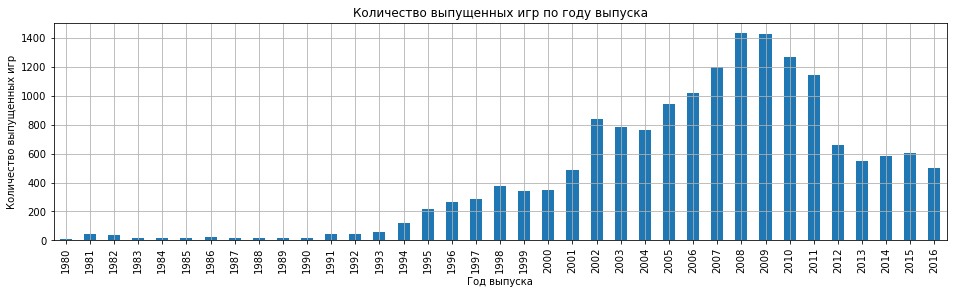

In [56]:
df_games.groupby('year_of_release')['name'].count().plot(kind="bar", figsize=(16, 4), grid=True);
plt.xlabel('Год выпуска');
plt.ylabel('Количество выпущенных игр');
plt.title('Количество выпущенных игр по году выпуска');

**Вывод**  
Больше всего игры было выпущено в 2008 и 2009 годах.  
До 2009 был рост количества игр, В 2012 произошел резкий спад.
___________________________________________________________________________________________

☑️**Вывод**

Важны ли данные за все периоды?  
Зависит от целей.

Например, чтобы понять росло или падало количество выпускаемых игр (насыщение рынка) нам важны данные за большой промежуток времени.

Наша цель: Вам нужно выявить определяющие успешность игры закономерности.  
Для такой большое период скорее является излишним, т.к. среда конкурентная, популярность игр, консолей и даже жанров быстрое меняется.  

Поэтому работа с данными за выбранный актуальный период несколько лет 
___________________________________________________________________________________________

📌  
Посмотрите, как менялись продажи по платформам.<a name="4"></a>

Посмотрим платформы с самыми высокими продажами.

Сгруппируем платформы по сумме продаж и % продаж от общей суммы.

In [57]:
df_platform_groupped = df_games.groupby(
    'platform')['sales_amount'].agg(['sum']).sort_values(by='sum', ascending=False).reset_index()

Запием долю продаж в поле 'mean'

In [58]:
df_platform_groupped['mean'] = df_platform_groupped['sum'] / sum(df_platform_groupped['sum']) * 100

Сгруппируем маленькие платформы с долей продаж меньше 3% в категорию 'other_platform'

In [59]:
df_platform_groupped['sales_group'] = np.where(
    df_platform_groupped['mean']<3, 'other_platform', df_platform_groupped['platform'])

Выведем топ 10 платформы по доле продаж

In [60]:
df_platform_groupped.sort_values(by='sum', ascending=False).head(10)

,platform,sum,mean,sales_group
0,PS2,1247.030029,14.073338,PS2
1,X360,964.710022,10.887219,X360
2,PS3,933.869995,10.539175,PS3
3,Wii,902.049988,10.180070,Wii
4,DS,802.900024,9.061115,DS
5,PS,727.580017,8.211093,PS
6,PS4,314.140015,3.545222,PS4
7,GBA,313.730011,3.540595,GBA
8,PSP,293.309998,3.310145,PSP
9,PC,258.730011,2.919893,other_platform


Построим круговую гистограмму с учетом того, что платформы с долей продаж меньше 3% определены в "other_platform"

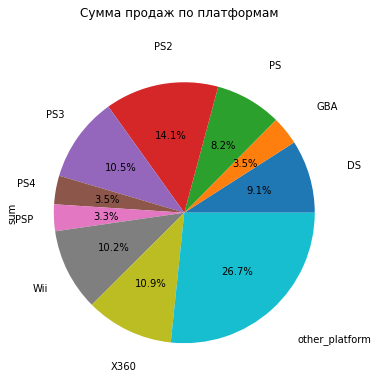

In [61]:
df_platform_groupped.groupby('sales_group')['sum'].sum().plot.pie(
    figsize=(6, 6), subplots=True, center=(
        10, 50), title='Сумма продаж по платформам', labeldistance=1.3, autopct='%1.1f%%');
plt.show();

Посмотрим продажи платформ в разрез года выпуска с помощзью scatterplot. Для этого сгруппируем значения по году.

In [62]:
df_platform_year_groupped = df_games.groupby(
    ['platform', 'year_of_release'])['sales_amount'].agg(['sum']).sort_values(by='sum', ascending=False).reset_index()

Построим scatterplot по платформам в разрезе года выпуска, чтобы наглядно посмотреть динамику продаж по платформам в разрезе периода.

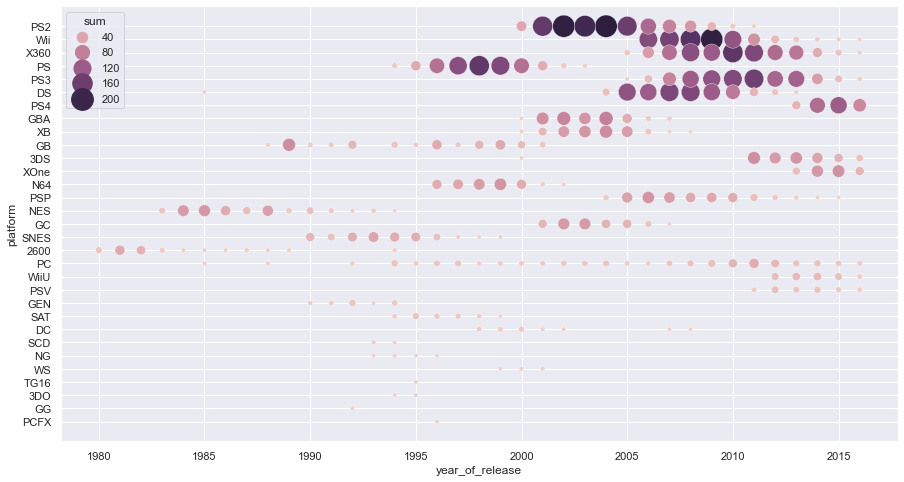

In [63]:
sns.set(rc = {'figure.figsize':(15,8)})
g = sns.scatterplot(data = df_platform_year_groupped, x='year_of_release', y='platform', size='sum', sizes=(20, 500), hue='sum');


**Вывод**  
Самые высокие продажи у платформ PS2 и X360.  
Суммарно 8 самых больших платформы имеют долю продаж больше 60%.  
То есть большие платформы имеют отрыв в продажах от маленьких конкурентов.  
В тоже время большая доля продаж распределена между небольшими платформами и составляет свыше 26%.  

На графике с периодом видно, что платформы как правило не популярны постоянно.  
Средний срок жизни платформы существенно меньше общего периода.  

Видно, что платформы набирают популярность , выходят на пик, спустя некоторое время перестают быть популярными.   
Им на сменту приходят новые продукты.  

Например, платформа DS начала набирать популярность 2004, вышла на пик в 2007-2008, в 2011 началось снижение и в 2014 продаж уже не было.
______________________________________________________________________

📌  
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.  <a name="5"></a>

Построим распределения по году выпуска для топ 5 платформ.

Запишем названия топ5 платформ в список.

In [64]:
names = list(df_platform_groupped.sort_values(by='mean', ascending=False)['platform'].head(5))

In [65]:
names

['PS2', 'X360', 'PS3', 'Wii', 'DS']

Списком выведем гистограммы для этих платформ.

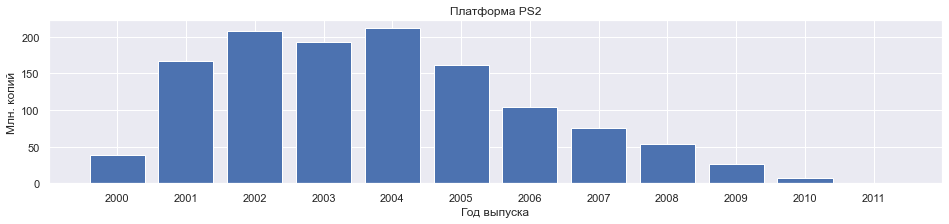

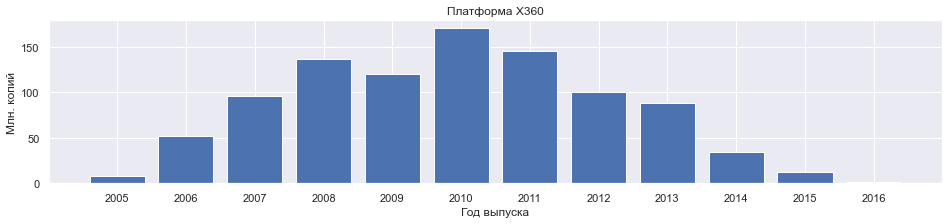

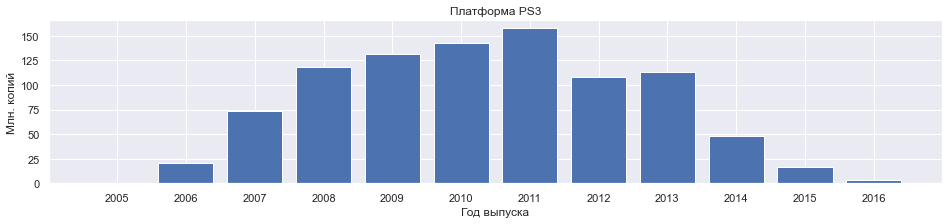

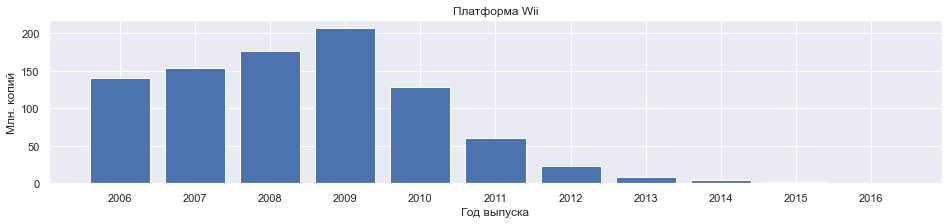

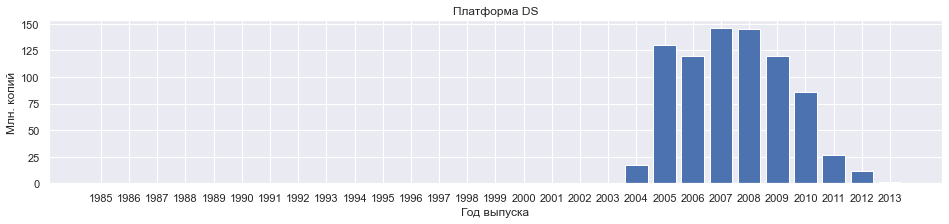

In [66]:
for i in range(0,len(names)):
    a = df_platform_year_groupped.loc[df_platform_year_groupped['platform']==names[i]][['year_of_release','sum']]
    x = a['year_of_release']
    y = a['sum']
    plt.figure(figsize=(16,3));
    plt.bar(x, y, align='center');
    plt.xlabel('Год выпуска');
    plt.grid(True)
    plt.xticks(np.arange(min(x), max(x)+1, step=1))
    plt.ylabel('Млн. копий');
    plt.title(f'Платформа {names[i]}');

**Вывод**  
Распределения платформ очень похожи между собой и имеют форму нормальных.  
Зачастую платформа набирает популярность, выходит на пик, после чего продажи платформы снижаются.  
Топ5 платформ за все время: 'PS2', 'X360', 'PS3', 'Wii', 'DS'
___________________________________________________________________________________________

📌  
За какой характерный срок появляются новые и исчезают старые платформы?<a name="6"></a>

**Посмотрим как часто появляются новые платформы.**

Группируем по платформе и году выпуска, сортировка по возрастанию

In [67]:
new_platform = df_platform_year_groupped.sort_values(by=['platform','year_of_release'], ascending=True)

Находим минимальный год выпуска для каждой платформы.  
Этот год будем считать годом начала работы платформы.

In [68]:
new_platform = new_platform.groupby('platform')['year_of_release'].min()

In [69]:
new_platform = new_platform.reset_index()

Сгруппируем кол-во новых платформ по году начала работы платформы.

In [70]:
new_platform = new_platform.groupby('year_of_release')['platform'].count()

In [71]:
new_platform = new_platform.reset_index()

In [72]:
new_platform = new_platform.rename(columns={'platform': 'new_platforms'})

Построим график количества новых платформ по году начала работы платформы.

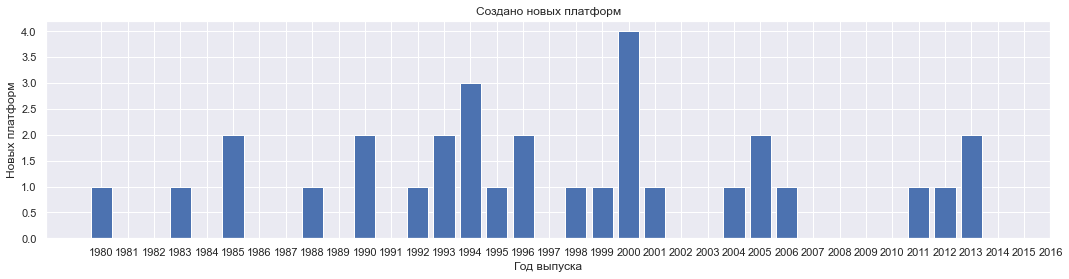

In [73]:
x = new_platform['year_of_release']
y = new_platform['new_platforms']
plt.figure(figsize=(18,4));
plt.bar(x, y, align='center');
plt.xticks(np.arange(min(x), 2017, step=1))
plt.xlabel('Год выпуска');
plt.ylabel('Новых платформ');
plt.title('Создано новых платформ');

Из графика видно, что наиболее частое появление новых платформ было с 1992 по 2001.  
Чтобы ответить на вопрос как часто появляются новые платформы:  
1. посчитаем сумму лет между появлением новых платформ  
2. Разделим на общее кол-во лет  

Получим метрику, которая показывает как часто в среднем появляются новые платформы.  
Нужно понимать, что значения средние.  

Есть периоды , когда платформа выпускается каждый год, а есть когда не выпускается 3 года.
___________________________________________________________________________________________

Создадим два списка:  
1. Все годы исследуемого периода  
2. Только годы появления платформ.

In [74]:
years_all = sorted(df_platform_year_groupped['year_of_release'].unique(), reverse=False)
years_new_platform = sorted(list(new_platform['year_of_release']), reverse=False)

Создадим список лет между появлением платформы.

In [75]:
between_year_release = []
a = 0
for i in years_all:
    if i in years_new_platform:
        a = 0
    else:
        a += 1
    between_year_release.append(a)

Посчитаем среднее кол-во дней между появлением новой платформы.

In [76]:
print(f'В среднем новая платформа появляется раз в ' +
      f'{int(round(sum(between_year_release) / len(between_year_release) * 365,0))} дней')

В среднем новая платформа появляется раз в 286 дней


Посмотрим как часто исчезают платформы.  
Для этого построим таблицу платформа - год окончания работы.  
За год окончания работы примем последний успешный выпуск игры.

In [77]:
closed_platform = df_platform_year_groupped.sort_values(by=['platform','year_of_release'], ascending=True)

Находим максимальный год выпуска для каждой платформы.

In [78]:
closed_platform = closed_platform.groupby('platform')['year_of_release'].max()

In [79]:
closed_platform = closed_platform.reset_index()

Сгруппируем кол-во ушедших платформ по году окончания работы.

In [80]:
closed_platform  = closed_platform .groupby('year_of_release')['platform'].count()

In [81]:
closed_platform = closed_platform.reset_index()

In [82]:
closed_platform = closed_platform.rename(columns={'platform': 'closed_platforms'})

Построим график количества ушедших платформ по год окончания работы.

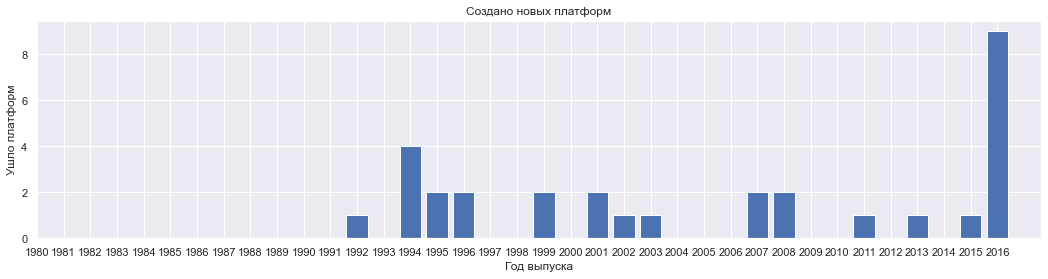

In [83]:
x = closed_platform['year_of_release']
y = closed_platform['closed_platforms']
plt.figure(figsize=(18,4));
plt.bar(x, y, align='center');
plt.xticks(np.arange(1980, 2017, step=1))
plt.xlabel('Год выпуска');
plt.ylabel('Ушло платформ');
plt.title('Создано новых платформ');

**Тут нужно учесть, что 2016 не является годом завершения работы платформы.  
Это последний год с данными.  
Учтем это при подсчете времени между уходом платформ.**

In [84]:
years_closed_platform = sorted(list(closed_platform['year_of_release']), reverse=False)
years_to_2015 = years_all[0:len(years_all)-1]

In [85]:
between_years_closed = []
c = 0
for i in years_to_2015:
    if i in years_closed_platform:
        c = 0
    else:
        c += 1
    between_years_closed.append(c)

In [86]:
years_between = round(sum(between_years_closed) / len(between_years_closed),2)

In [87]:
print(f'В среднем платформы уходят с рынка раз в {int(years_between)} года ' +
      f'{int(years_between%int(years_between)*365)} дня')

В среднем платформы уходят с рынка раз в 2 года 222 дня


Дополнительно посчитаем средний срок жизни платформ и построим график срока жизни платформ исходя из мин. и макс. года выпуска игры.  

In [88]:
lt_platform = df_platform_year_groupped.groupby('platform')['year_of_release'].count().sort_values(ascending=False)

In [89]:
print(f'В среднем одна платформа существует {int(lt_platform.mean())} лет ' +
      f'{int(lt_platform.mean()%int(lt_platform.mean())*365)} дня')

В среднем одна платформа существует 7 лет 282 дня


График средней жизни платформы.

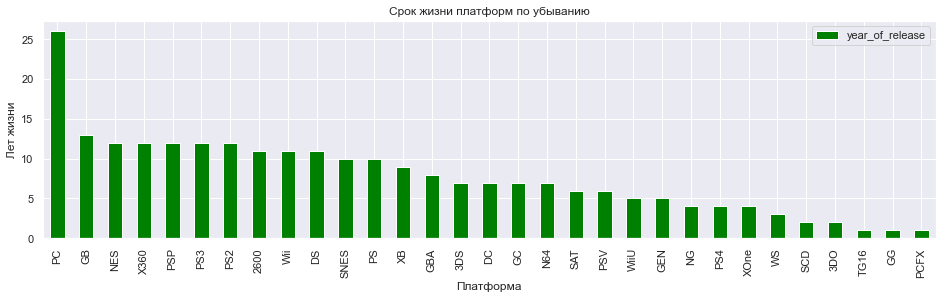

In [90]:
lt_platform.plot(kind="bar", figsize=(16, 4), grid=True, color='green');
plt.legend(loc='upper right');
plt.xlabel('Платформа');
plt.ylabel('Лет жизни');
plt.title('Срок жизни платформ по убыванию');

📌  
Возьмите данные за соответствующий актуальный период.<a name="7"></a>  

Рыночная ситуация меняется быстро.  
Игры стремительно набирают и теряют популярность, а платформы имеют ограниченный срок существования, поэтому для прогноза лучшим из вариантов будет использовать данные за последние 3 достоверных года, а именно за именно **2014-2016**.
___________________________________________________________________________________________

📌   
Какие платформы лидируют по продажам, растут или падают?<a name="8"></a>  

Чтобы понять какие-платформы растут или падают нужно:
1. Сгруппировать продажи по платформам  
2. Добавить динамику продаж к предыдущему году: 2016 к 2015.

Данные в полном виде только за 2014-2016.

In [91]:
df_games_14_16 = df_games.loc[(df_games['year_of_release']>=2014)]

Группировка 2014-2016 по платформам.

In [92]:
df_games_14_16_platfrom = df_games_14_16.pivot_table(
    index=['platform'], values=['sales_amount', 'user_score', 'critic_score'], aggfunc={\
        'sales_amount': 'sum', 'user_score': 'mean', 'critic_score': 'mean'}).reset_index()

☑️
Данные за 2014 - 2016 годы отдельно для подсчета динамики 2016 к 2015.

In [93]:
df_games_14_16_sales = df_games_14_16.pivot_table(
    index=['platform'], columns=['year_of_release'], values=['sales_amount'], aggfunc={'sales_amount': 'sum'}).reset_index()

In [94]:
df_games_14_16_sales = df_games_14_16_sales.droplevel(1, axis=1) 

In [95]:
df_games_14_16_sales.head(2)

,platform,sales_amount,sales_amount,sales_amount
0,3DS,43.759998,27.780001,15.14
1,PC,13.280001,8.520000,5.25


In [96]:
df_games_14_16_sales.columns.values[1] = "2014"
df_games_14_16_sales.columns.values[2] = "2015"
df_games_14_16_sales.columns.values[3] = "2016"

Новый столбец.

In [97]:
df_games_14_16_sales['2016/2015'] = round(((
    df_games_14_16_sales['2016']-df_games_14_16_sales['2015'])/df_games_14_16_sales['2015']*100),0)

In [98]:
df_games_14_16_platfrom  = df_games_14_16_platfrom.merge(
    df_games_14_16_sales[['platform', '2016/2015']], on='platform', how='left')

In [99]:
df_games_14_16_platfrom['sales_amount_mean'] = df_games_14_16_platfrom['sales_amount'] / sum(
    df_games_14_16_platfrom['sales_amount']) * 100

Группировка по платформе с динамикой 2016 к 2015 и общими продажами за 2014-2016
- sales_amount_mean - доля продаж за 2014-2016 год  
- 2016/2015 - динамика 2016 к 2015 в %

In [100]:
df_games_14_16_platfrom.sort_values(by=['sales_amount','2016/2015'], ascending=False)

,platform,critic_score,sales_amount,user_score,2016/2015,sales_amount_mean
3,PS4,72.164558,288.149994,6.828099,-42.0,39.502365
9,XOne,73.793549,140.360001,6.594545,-57.0,19.241896
0,3DS,68.980392,86.680000,7.138182,-46.0,11.882925
2,PS3,66.555557,68.180000,6.014286,-79.0,9.346768
8,X360,63.730770,48.220001,5.771084,-87.0,6.610460
7,WiiU,71.186043,42.980000,7.087500,-72.0,5.892110
1,PC,76.215515,27.050001,6.298361,-38.0,3.708274
5,PSV,72.259262,22.400000,7.656165,-32.0,3.070807
6,Wii,NaN,5.070000,6.350000,-84.0,0.695044
4,PSP,NaN,0.360000,NaN,NaN,0.049352


**Вывод**  
В 2016 году к 2015 все платформы упали в продажах новых выпусков.  
Меньше всего падение у платформ PSV	на 32% и PC на 38%.  

Лучшие продажи у PS4 и XOne.  
Платформы являются лидерами продаж с большим отрывом, суммарно обе платформы имеют свыше 58% продаж за 2014-2016.  
Высокий % падения у платформ: X360	 = 87% и Wii = 84%.

Потенциально прибыльные платформы, показывающие рост продаж: PS4, Xone, т.к. они генерируют свыше 58% продаж.  
По динамик продаж интересные платформы PC и PSV.
___________________________________________________________________________________________

📌   
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.<a name="9"></a>

Названия платформ для графика списком.

In [101]:
pl_names = df_games_14_16_platfrom ['platform'].unique()
pl_names

array(['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360',
       'XOne'], dtype=object)

☑️Сгрупируем игры по платформам, аггрегируемым значением будут продажи.  
Такая таблица нужна для boxplot на одно графике.

In [102]:
df_games_14_16_platfrom_for_box = df_games_14_16.pivot_table(
    index=['name'], columns=['platform'], values=['sales_amount'], aggfunc={'sales_amount': 'sum'}).reset_index()

In [103]:
df_games_14_16_platfrom_for_box = df_games_14_16_platfrom_for_box.droplevel(1, axis=1)

Обработаем столбцы , перименуем.

In [104]:
df_games_14_16_platfrom_for_box.columns.values[1] = "3DS"
df_games_14_16_platfrom_for_box.columns.values[2] = "PC"
df_games_14_16_platfrom_for_box.columns.values[3] = "PS3"
df_games_14_16_platfrom_for_box.columns.values[4] = "PS4"
df_games_14_16_platfrom_for_box.columns.values[5] = "PSP"
df_games_14_16_platfrom_for_box.columns.values[6] = "PSV"
df_games_14_16_platfrom_for_box.columns.values[7] = "Wii"
df_games_14_16_platfrom_for_box.columns.values[8] = "WiiU"
df_games_14_16_platfrom_for_box.columns.values[9] = "X360"
df_games_14_16_platfrom_for_box.columns.values[10] = "XOne"

In [105]:
names_for_box = df_games_14_16_platfrom_for_box.columns[1:len(df_games_14_16_platfrom_for_box)]

In [106]:
names_for_box

Index(['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'], dtype='object')

☑️Выведем график Boxplot

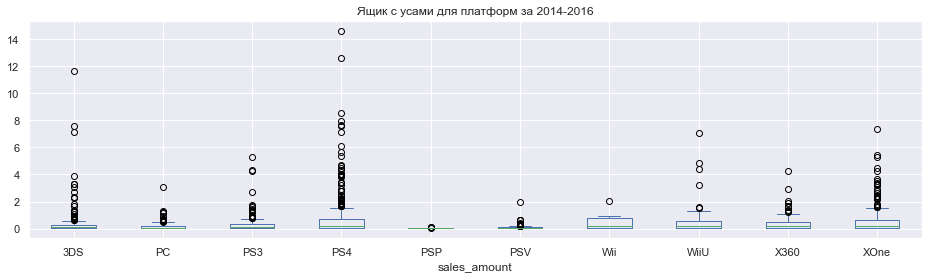

In [107]:
df_games_14_16_platfrom_for_box[names_for_box].plot(
    kind='box', title='Ящик с усами для платформ за 2014-2016', label='sales_amount', figsize=(16, 4));
plt.xlabel('sales_amount');
plt.show();

☑️Приблизим значения, чтобы лучшем было видно медиану и квартили.

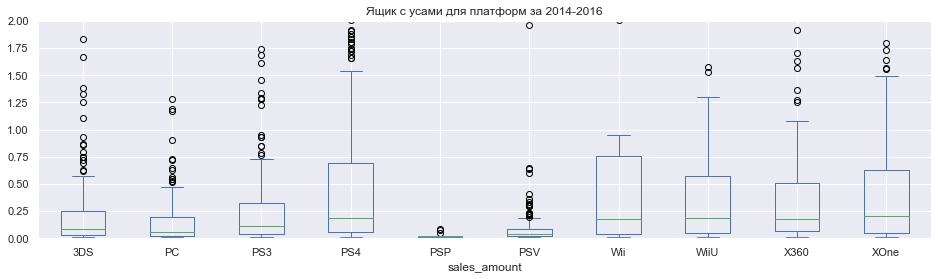

In [108]:
df_games_14_16_platfrom_for_box[names_for_box].plot(
    kind='box', title='Ящик с усами для платформ за 2014-2016', label='sales_amount', figsize=(16, 4));
plt.xlabel('sales_amount');
plt.ylim([0, 2])
plt.show();

Построим метод описательную статистику в дополнение к boxplot() для каждой платформы.

In [109]:
df_games_14_16_platfrom_for_box[names_for_box].describe().T

,count,mean,std,min,25%,50%,75%,max
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


**Вывод**  
Из boxplot и describe видно, что большая часть значений лежит близко к 0.  
Выручка каждой выпущенной игры варьируется от 10 тыс. до нескольких млн. копий.  
При этом видно, что есть игры, которые становятся хитами и собирают большую часть выручки новых запусков.  
Так, например, по платформе PS4 тянется длинный хвост, а самые большие продажи игры составляют 14,63 млн. копий.  
При этом медианное значение составляет всего 185 тыс.копий.  

Также видно, что чем больше игр-хитов на платформе, тем больше стандартное отклонение и тем более усатый наш график :)

То есть основные продажи приносят "игры-хиты", а большая часть игр не приносят больших продаж.
___________________________________________________________________________________________

📌   
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.<a name="10"></a>  
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 

Возьмем самую популярную платформу по продажам PS4.

In [110]:
df_games_14_16_PS4 = df_games_14_16.loc[(df_games['platform']=='PS4')]

Сгруппируем проддажи и оценки критиков в одной таблице.

In [111]:
df_games_14_16_PS4[['critic_score', 'user_score', 'sales_amount']]

,critic_score,user_score,sales_amount
31,NaN,NaN,14.630000
42,97.0,8.3,12.620001
77,82.0,4.3,8.580000
87,NaN,NaN,7.980000
92,83.0,5.7,7.660000
...,...,...,...
16315,69.0,7.5,0.010000
16318,NaN,NaN,0.010000
16340,61.0,7.9,0.010000
16344,51.0,5.5,0.010000


Корреляци между отзывами и продажами

In [112]:
corr_critics = round(df_games_14_16_PS4[[
    'critic_score', 'user_score', 'sales_amount']].corr()['sales_amount'][0], 3)
corr_users = round(df_games_14_16_PS4[[
    'critic_score', 'user_score', 'sales_amount']].corr()['sales_amount'][1], 3)

In [113]:
print(
    f'Коэффициент корреляции продаж от оценки критиков: {corr_critics}. Зависимость прямая линейная.'
)
print(
    f'Коэффициент корреляции продаж от оценки критиков: {corr_users}. Зависимость отсутствует.'
)      

Коэффициент корреляции продаж от оценки критиков: 0.403. Зависимость прямая линейная.
Коэффициент корреляции продаж от оценки критиков: -0.04. Зависимость отсутствует.


Диаграмма рассеяния по продажам к оценкам критиков и оценки пользователей

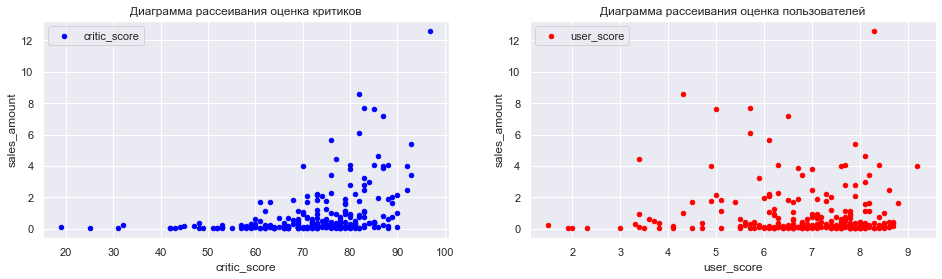

In [114]:
fig, axs = plt.subplots(1,2)
df_games_14_16_PS4.plot(x = 'critic_score', y='sales_amount', kind='scatter', ax=axs[0], figsize=(
    16, 4), color='blue', label='critic_score', grid=True);
axs[0].set(title='Диаграмма рассеивания оценка критиков');

df_games_14_16_PS4.plot(x = 'user_score', y='sales_amount', kind='scatter', ax=axs[1], figsize=(
    16, 4), color='red', label='user_score', grid=True);
axs[1].set(title='Диаграмма рассеивания оценка пользователей');

По диаграмме видно, что разброс значений оценок пользователей действтельно более хаотичный.

**Вывод**  
Для платформы PS4:  

- Есть прямая линейная зависимость суммы продаж от оценок критиков, коэф.корреляции 0,403 говорит о наличии прямой линейной зависимости, сила зависиомости ниже среднего (1 макс, 0 мин).  

- Есть слабая обратная зависимость продаж от оценок пользователей, коэф.корреляции -0,04 говорит о том, что зависимость практически отсутствует (-1 макс, 0 мин).  

Обратная зависимость от оценок пользователей очень сложно объяснима, возможно пользователи чаще ставят плохие оценки, чем хорошие и, т.к. у нас данные продж в год выпуска, возможно количество продаж в этот год больше зависит от рекламного бюджета, чем от отзывов. 
___________________________________________________________________________________________

📌   
Посмотрите на общее распределение игр по жанрам.<a name="11"></a>  
Что можно сказать о самых прибыльных жанрах?  
Выделяются ли жанры с высокими и низкими продажами?

В этом блоке посмотрим на популярные игры за весь период и за актуальный период.

**Популярные игры за весь период.**

Построим группировку по продажам и количеству выпущенных игр , отсортируем по убыванию продаж.

In [115]:
df_games_genre_groupped = df_games.groupby('genre').agg(
    {'sales_amount': 'sum', 'name': 'count'}).sort_values(by='sales_amount', ascending=False).reset_index() 

In [116]:
df_games_genre_groupped = df_games_genre_groupped.rename(columns={'name': 'games_amount'})

Добавим столбец продаж на одну выпущенную игру.

In [117]:
df_games_genre_groupped['sales_per_game'] = df_games_genre_groupped['sales_amount'] / df_games_genre_groupped['games_amount']

In [118]:
df_games_genre_groupped.sort_values(by='sales_per_game', ascending=False)

,genre,sales_amount,games_amount,sales_per_game
4,Platform,825.549988,878,0.940262
2,Shooter,1049.000000,1306,0.803216
3,Role-Playing,931.390015,1482,0.628468
6,Racing,724.489990,1233,0.587583
1,Sports,1325.869995,2325,0.570267
7,Fighting,443.470001,841,0.527313
0,Action,1733.390015,3333,0.520069
5,Misc,792.979980,1730,0.458370
8,Simulation,387.880005,858,0.452075
9,Puzzle,240.539993,573,0.419791


**Вывод**  
Наиболее популярными жанрами по продажам игр являются 'Action' и 'Sports'.  
При этом наибольшая выручка в среднем на игру в жанрах: 'Platform' и 'Shooter'.  
Возможно эти жанры недооценены.
___________________________________________________________________________________________

**Популярные игры за актуальный период.**

Построим группировку по продажам и количеству выпущенных игр , отсортируем по убыванию продаж.

In [119]:
df_games_genre_groupped_14_16 = df_games_14_16.groupby('genre').agg(
    {'sales_amount': 'sum', 'name': 'count'}).sort_values(by='sales_amount', ascending=False).reset_index() 

In [120]:
df_games_genre_groupped_14_16 = df_games_genre_groupped_14_16.rename(columns={'name': 'games_amount'})

Добавим столбец продаж на одну выпущенную игру.

In [121]:
df_games_genre_groupped_14_16['sales_per_game'] = df_games_genre_groupped_14_16[
    'sales_amount'] / df_games_genre_groupped_14_16['games_amount']

In [122]:
df_games_genre_groupped_14_16.sort_values(by='sales_per_game', ascending=False)

,genre,sales_amount,games_amount,sales_per_game
1,Shooter,170.940002,128,1.335469
2,Sports,109.480003,161,0.680000
7,Platform,18.090000,38,0.476053
5,Fighting,28.219999,60,0.470333
3,Role-Playing,101.440002,221,0.459005
6,Racing,27.520000,69,0.398841
4,Misc,37.549999,113,0.332301
0,Action,199.360001,619,0.322068
9,Simulation,13.130000,44,0.298409
11,Puzzle,2.210000,14,0.157857


**Дополнительно построим график продаж жанров по годам.**

In [123]:
genre_year_groupped = df_games.groupby(['genre', 'year_of_release'])['sales_amount'].sum().reset_index()

In [124]:
genre_year_groupped.head(2)

,genre,year_of_release,sales_amount
0,Action,1980,0.34
1,Action,1981,14.79


scatterplot о том, как менялась популярность жанров по выпуску новинок и их продажам.

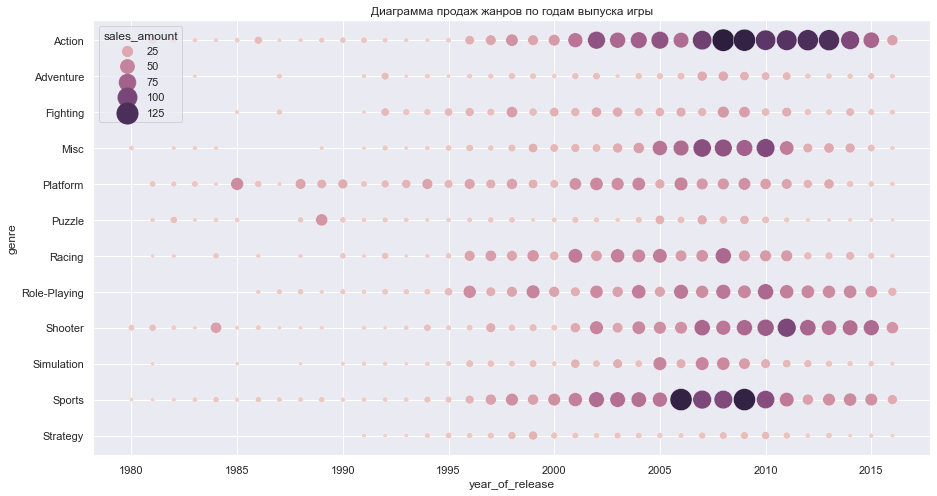

In [125]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.scatterplot(
    data = genre_year_groupped, x='year_of_release', y='genre', size='sales_amount', sizes=(
        20, 500), hue='sales_amount').set_title('Диаграмма продаж жанров по годам выпуска игры');


**Вывод**  
Наиболее популярными жанрами в 2014-2016 по продажам новых игр являются 'Action' и 'Shooter'.  
На эти жарны приходится больше всего продаж новых выпусков в 2014-2016. 
Похоже, что жанр Shooter - это тренд последних лет, в отличие от многих других жанров он набирал популярность, а также у этого жанра лучший показатель продаж в расчете на выпущенную игру.  

Популярными жанрами в последние годы с наибольшим числом успешных запусков были 'Action' и 'Shooter'.
___________________________________________________________________________________________

**Общий вывод**  

✔️ Новые платформы появляются в среднем чаще чем раз в год, в среднем прекращают существование немного чаще чем раз в 2,5 года, а срок жизни платформы составляет чуть больше 7 лет. Конкуренция растет, платформ становится все больше.  

✔️ Игры имеют очень большой разброс значений проданных копий. Есть много провальных игр, которые приносят мало денег и игры-хиты, которые собирают большую часть продаж.

✔️Платформами с наибольшими суммарными продажами по выпускам игр за всё время являются 'PS2' и 'X360'. В актуальном периоде на основе 2014-2016 годаов набольшей популярностью пользуются платформы: PS4 и Xone. Обе платформы показали падение к предыдущему году, но на долю этих двух платформ приходится свыше 53% суммарных продаж запусков игр.  

✔️На основе популярной платформы PS4 можно сделать вывод, что есть зависимость продаж новых выпусков от оценки критиков и нет зависимости продаж новых игр от оценки пользователей. Чем выше оценка критиков, тем выше продажи.  

✔️Наиболее популярными жанрами в 2014-2016 являются 'Action' и 'Shooter', при этом наибольшие продажи на один запуск приносят жанры 'Shooter' и 'Sports'.  
___________________________________________________________________________________________

### Шаг 4. Составьте портрет пользователя каждого региона<a name="client_portrait"></a>

❗️ Все данные этого блока за актуальный период **2016**

📌  
Самые популярные платформы (топ-5). Опишите различия в долях продаж.<a name="12"></a>

In [126]:
df_games_14_16_platfrom .sort_values(by=['sales_amount','2016/2015'], ascending=False).head(5)

,platform,critic_score,sales_amount,user_score,2016/2015,sales_amount_mean
3,PS4,72.164558,288.149994,6.828099,-42.0,39.502365
9,XOne,73.793549,140.360001,6.594545,-57.0,19.241896
0,3DS,68.980392,86.680000,7.138182,-46.0,11.882925
2,PS3,66.555557,68.180000,6.014286,-79.0,9.346768
8,X360,63.730770,48.220001,5.771084,-87.0,6.610460


**Вывод**  

PS4 является наиболее популярной платформой, ее доля продаж составляет 39%.  
Ближайший конкурент XOne имеет долю 19%.  
Остальные 3 платформы имеют долю продаж новых выпусков от 6 до 12%.  

Существует большой отрыв лидера PS4 от конкурентов, а также 2 платформы (XOne) от остальных платформ.
___________________________________________________________________________________________

📌  
Самые популярные жанры (топ-5). Поясните разницу.<a name="13"></a>

In [127]:
df_games_genre_groupped_14_16.sort_values(by='sales_amount', ascending=False).head(5)

,genre,sales_amount,games_amount,sales_per_game
0,Action,199.360001,619,0.322068
1,Shooter,170.940002,128,1.335469
2,Sports,109.480003,161,0.680000
3,Role-Playing,101.440002,221,0.459005
4,Misc,37.549999,113,0.332301


**Вывод**  

Наиболее популярными жанрами по числу проданных копий являются:  
'Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'.  
Первые два жанра 'Shooter' и 'Action' идут с отрывом от конкурентных жанров 'Sports' и 'Role-Playing', а последний жанр 'Misc' сильно отстает.  
Похоже, что пользователям нравится "экшн" и "стрелялки", они по-прежнеему в тренде.
___________________________________________________________________________________________

📌  
Влияет ли рейтинг ESRB на продажи в отдельном регионе?<a name="14"></a>  

Построим таблицу с продажами по регионам с разрезе рейтинга.

In [128]:
df_games_14_16

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_amount
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,tbd,14.630000
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.620001
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,tbd,11.680000
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.580000
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,tbd,7.980000
...,...,...,...,...,...,...,...,...,...,...,...,...
16516,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,tbd,0.010000
16520,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,tbd,0.010000
16522,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,tbd,0.010000
16524,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,tbd,0.010000


In [129]:
sales_by_rating_14_16 = df_games_14_16.groupby(
    'rating').agg(
        {'na_sales' : 'sum', 'eu_sales' : 'sum', 'jp_sales' : 'sum', 'other_sales' : 'sum', 'sales_amount' : 'sum'}).reset_index()
sales_by_rating_14_16

,rating,na_sales,eu_sales,jp_sales,other_sales,sales_amount
0,E,50.740002,58.060001,8.940000,15.39,133.130005
1,E10+,33.230000,26.160000,4.460000,7.83,71.680000
2,M,96.419998,93.440002,8.010000,28.67,226.539993
3,T,38.950001,34.070000,14.780000,11.33,99.129997
4,tbd,64.720001,58.950001,56.900002,18.40,198.970001


Сделаем таблицу с долей продаж (% продаж) каждого рейтинга по регионам.

In [130]:
names_regions = sales_by_rating_14_16.columns[1:len(sales_by_rating_14_16.columns)]
names_regions

Index(['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales_amount'], dtype='object')

In [131]:
for i in names_regions:
    sales_by_rating_14_16[i] = sales_by_rating_14_16[i] / sales_by_rating_14_16['sales_amount'] * 100
    sales_by_rating_14_16[i] = [round(x, 2) for x in sales_by_rating_14_16[i]]

Получили % продаж в разрезе категорий по регионам.

In [132]:
sales_by_rating_14_16

,rating,na_sales,eu_sales,jp_sales,other_sales,sales_amount
0,E,38.11,43.61,6.72,11.56,100.0
1,E10+,46.36,36.50,6.22,10.92,100.0
2,M,42.56,41.25,3.54,12.66,100.0
3,T,39.29,34.37,14.91,11.43,100.0
4,tbd,32.53,29.63,28.60,9.25,100.0


**Вывод**  
По рейтингу ESRB действительно есть небольшая специфика:  
- В Северной америке большая популярность рейтинга «E10+» («Everyone 10 and older») и «M» («Mature») — «Для взрослых»; а рейтинг «T» («Teen») — «Подросткам» не пользуется популярностью;
- В ЕС большей популярностью пользуются игры с рейтингом «E» («Everyone») и рейтинг «M» («Mature») — «Для взрослых»;  
- В Японии самый популярный рейтинг «T» («Teen») — «Подросткам».
___________________________________________________________________________________________

### Шаг 5. Проверьте гипотезы<a name="hypothesis"></a>

📌  
• Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
• Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


📌  
#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.<a name="15"></a>   

☑️
Сначала проверим количество заполненных оценок по платформам за актуальный период 2016.

In [133]:
print('Оценок XOne:', df_games_14_16.query('platform=="XOne"')['user_score'].count())
print('Оценок PC:', df_games_14_16.query('platform=="PC"')['user_score'].count())

Оценок XOne: 165
Оценок PC: 122


Оставим только заполненные оценки и оставим только столбцы 'platform', 'name', 'year_of_release', 'user_score'.

In [134]:
df_games_14_16_pl_score = df_games_14_16[df_games_14_16['user_score'].isna()==False]\
    [['platform', 'name', 'year_of_release', 'user_score']];

Выведем среднюю оценку платформы за несколько лет для каждой игры.  
Так, если в 2014 была оценка 10, в 2015 = 9, в 2014 = 8. Средняя оценка будет 9.

In [135]:
df_games_14_16_pl_score = df_games_14_16.groupby(['platform', 'name']).agg({'user_score': 'mean'}).reset_index()

In [136]:
df_games_14_16_pl_score.head(3)

,platform,name,user_score
0,3DS,Beyblade Burst,NaN
1,3DS,Fire Emblem Fates,NaN
2,3DS,Haikyu!! Cross Team Match!,NaN


Добавим функцию для подсчета среднего , дисперсии , стандартного отклонения, границ доверительных интервалов

In [137]:
def statistics(data, name, groupby, metric):
    print(name.center(30))
    x_mean = round(data[data[groupby]==name][metric].mean(), 2)
    x_variance = round(np.var(data[data[groupby]==name][metric], ddof=1), 2)
    x_std = round(np.sqrt(x_variance), 2)
    x_bottom_1std = round(x_mean - 1 * x_std, 2)
    x_top_1std = round(x_mean + 1 * x_std, 2)
    res = print('Среднее значение выборки:', x_mean, '\n' 'Дисперсия:', x_variance, '\n' 'Стандартное отклонение:', x_std, '\n' f'В среднем 68% ставят оценку от {x_bottom_1std} до {x_top_1std}')
    return res

In [138]:
names_pl_14_16 = ['XOne', 'PC']

In [139]:
for i in names_pl_14_16:
    statistics(df_games_14_16, i, 'platform', 'user_score')

             XOne             
Среднее значение выборки: 6.59 
Дисперсия: 1.89 
Стандартное отклонение: 1.37 
В среднем 68% ставят оценку от 5.22 до 7.96
              PC              
Среднее значение выборки: 6.3 
Дисперсия: 2.9 
Стандартное отклонение: 1.7 
В среднем 68% ставят оценку от 4.6 до 8.0


Сформулируем нулевую гипотезу:  
H0 - cредние пользовательские рейтинги платформ Xbox One и PC на основе изучаемой выборки не отличаются.

Сформируем альтернативную гипотезу:  
H1 -  cредние пользовательские рейтинги платформ Xbox One и PC на основе изучаемой выборки отличаются.

Используем двухсторонний st.ttest_ind, который проеряет гипотезу о равенстве двух генеральных совокупностей по выборкам.  
Выборки в нашем случае независимые.  
Дисперсии отличаются, но не так сильно, поэтому оставим equal_var с параметром по умолчанию True.

Готовим данные для теста.

In [140]:
df_XOne = df_games_14_16_pl_score[df_games_14_16_pl_score['platform']=='XOne']['user_score']
df_PC = df_games_14_16_pl_score[df_games_14_16_pl_score['platform']=='PC']['user_score']

In [141]:
alpha = .05 # критический уровень статистической значимости. Если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    df_XOne, df_PC)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


**Вывод**  
Полученное значение p-value говорит о том, что вероятность получить одинаковые значения достаточно большая, а именно 10%.  
Такая вероятность выше целевых 5% (p-value), чтобы делать вывод об различии между средними пользовательскими оценками платформ 'XOne', 'PC'.    

Изначальное предположение верное, справедлива нулевая гипотеза, которая говорит следующее:  

**Есть основания полагать, что cредние пользовательские рейтинги платформ Xbox One и PC на основе изучаемой выборки не отличаются**
___________________________________________________________________________________________

📌  
#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.<a name="16"></a> 

Возьмем данные пользовательских оценок в разрезе жанров за период 2014-2016 год.

In [142]:
df_games_14_16_genre = df_games_14_16[df_games_14_16['user_score'].isna()==False]\
    [['genre', 'name', 'year_of_release', 'user_score']];

In [143]:
df_games_14_16_genre = df_games_14_16_genre.groupby(['genre', 'name']).agg({'user_score': 'mean'}).reset_index()

In [144]:
df_games_14_16_genre.head(3)

,genre,name,user_score
0,Action,7 Days to Die,5.55
1,Action,Adventure Time: The Secret of the Nameless Kin...,6.55
2,Action,Aegis of Earth: Protonovus Assault,8.05


Используем ранее добавленную функцию для подсчета среднего , дисперсии , стандартного отклонения, границ доверительных интервалов

In [145]:
names_genre_14_16 = ['Action', 'Sports']

In [146]:
for i in names_genre_14_16:
    statistics(df_games_14_16_genre, i, 'genre', 'user_score')

            Action            
Среднее значение выборки: 6.82 
Дисперсия: 1.88 
Стандартное отклонение: 1.37 
В среднем 68% ставят оценку от 5.45 до 8.19
            Sports            
Среднее значение выборки: 5.4 
Дисперсия: 2.27 
Стандартное отклонение: 1.51 
В среднем 68% ставят оценку от 3.89 до 6.91


Сформулируем нулевую гипотезу:  
H0 - cредние пользовательские рейтинги платформ жанров Action и Sports на основе изучаемой выборки не отличаются.

Сформируем альтернативную гипотезу:  
H1 -  cредние пользовательские рейтинги платформ жанров Action и Sports на основе изучаемой выборки отличаются.

Используем двухсторонний st.ttest_ind, который проеряет гипотезу о равенстве двух генеральных совокупностей по выборкам.  
Выборки в нашем случае независимые.  
Дисперсии отличаются, но не так сильно, поэтому оставим equal_var с параметром по умолчанию True.

Готовим данные на вход.

In [147]:
df_Action = df_games_14_16_genre[df_games_14_16_genre['genre']=='Action']['user_score']
df_Sports = df_games_14_16_genre[df_games_14_16_genre['genre']=='Sports']['user_score']

In [148]:
alpha = .05 # критический уровень статистической значимости. Если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    df_Action, df_Sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.4239640595692565e-08
Отвергаем нулевую гипотезу


**Вывод**  
Полученное значение p-value говорит о том, что вероятность получить одинаковые значения очень маленькая, а именно 1.94e-08.  
Такая вероятность существенно меньше целевых 5%, чтобы делать вывод об отсутствии различия между средними пользовательскими по жанрам Action и Sports.  

Изначальное предположение было верное, справедлива альтернативная гипотеза, которая говорит следующее:  
**Есть основания полагать, что cредние пользовательские рейтинги жанров 'Action' и 'Sports' на основе изучаемой выборки отличаются**

### Шаг 6. Напишите общий вывод <a name="conclusion"></a>

**Общий вывод**  
Определяющие успешность игры закономерности:
    
✔️ Высокий рейтинг критиков позитивно влияет на продажи. Чем выше рейтинг, тем выше обычно продажи копий игры.  
Перед запуском игры стоит внимательно изучить оценки экспертов.

✔️ Ключевыми жанрами с высокими продажами являются: 'Shooter', 'Action', 'Sports'.  
Также нужно отметить, что жанр 'Shooter' последние годы набирал популярность, а также в расчете на выпущенную игру продажи в этом жанре самые высокие.  

✔️ Ключевыми платформами в периоде 2014-2016 были PS4 и XOne, на них продилось свыше 53% продаж.  
Этим платформам необходимо уделить больше внимания, как основополагающим успешного запуска.  

Также интересны платформы PSV и PC , динамика их показателей по продажам новых игр к прошлому периоду лучше, чем у других платформ.  

✔️ Чтобы добиться успеха на определнных рынках необходимо сделать акцент:
- В Северной америке большая популярность рейтинга «E10+» («Everyone 10 and older») и «M» («Mature») — «Для взрослых»; а рейтинг «T» («Teen») — «Подросткам» не пользуется популярностью;
- В ЕС большей популярностью пользуются игры с рейтингом «E» («Everyone») и рейтинг «M» («Mature») — «Для взрослых»;
- В Японии самый популярный рейтинг «T» («Teen») — «Подросткам».

Наиболее популярным рейтингом для игры является «M» («Mature»).

✔️ Нужно помнить, что редкая игра становятся хитом, но именно эти игры приносят большую часть продаж.  
Ищем "звезды" и не забываем, что платформы могут устаревать.  
Технологии развиваются и популярные сегодня платформы могут смениться новыми завтра.  
Важно не упустить этот момент.